In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt
import utils2p

In [2]:
base_dir = "/home/jbraun/bin/deepinterpolation/sample_data"

# raw_path_longterm = "/home/jbraun/bin/deepinterpolation/sample_data/longterm_003_crop.tif"

raw_path_210301 = os.path.join(base_dir, "210301_001_crop.tif")
denoised_path_210301_1000 = os.path.join(base_dir, "denoised_random1_01_1000_210301_001_crop_out.tif")
denoised_path_210301_2000 = os.path.join(base_dir, "denoised_random1_01_2000_210301_001_crop_out.tif")
denoised_path_210301_500 = os.path.join(base_dir, "denoised_random1_01_500_210301_001_crop_out.tif")
denoised_path_210301_4000 = os.path.join(base_dir, "denoised_random1_01_4000_210301_001_crop_out.tif")
denoised_path_210301_2x2000 = os.path.join(base_dir, "denoised_random1_01_2x2000_210301_001_crop_out.tif")
denoised_path_210301_2x1000 = os.path.join(base_dir, "denoised_random1_01_2x1000_210301_001_crop_out.tif")
denoised_path_210301_2nd2000 = os.path.join(base_dir, "denoised_random1_01_2nd2000_210301_001_crop_out.tif")
denoised_path_210301_12th2000 = os.path.join(base_dir, "denoised_random1_01_12th2000_210301_001_crop_out.tif")



denoised_paths = [denoised_path_210301_500,
                  denoised_path_210301_1000,
                  denoised_path_210301_2000,
                  denoised_path_210301_4000,
                  denoised_path_210301_2x1000,
                  denoised_path_210301_2x2000,
                  denoised_path_210301_2nd2000,
                  denoised_path_210301_12th2000
                 ]
denoised_strings = ["500",
                    "1000",
                    "2000",
                    "4000",
                    "2x1000",
                    "2x2000",
                    "2nd2000",
                    "12th2000"
                    ]

In [3]:
raw = utils2p.load_img(raw_path_210301)[30:-30,:,:]
denoised = [utils2p.load_img(denoised_path) for denoised_path in denoised_paths]

## check what the denoising did

In [5]:
std_raw = np.std(raw, axis=0)
std_denoised = [np.std(d, axis=0)for d in denoised]

In [6]:
pixels = [[174, 97], [91, 172], [171, 280], [122, 443], [185, 575]]
# left bottom, left top, center, top right dim, bottom right
pixels_noise = [[50, 50], [129, 272]]
# outside, giant fiber

<IPython.core.display.Javascript object>


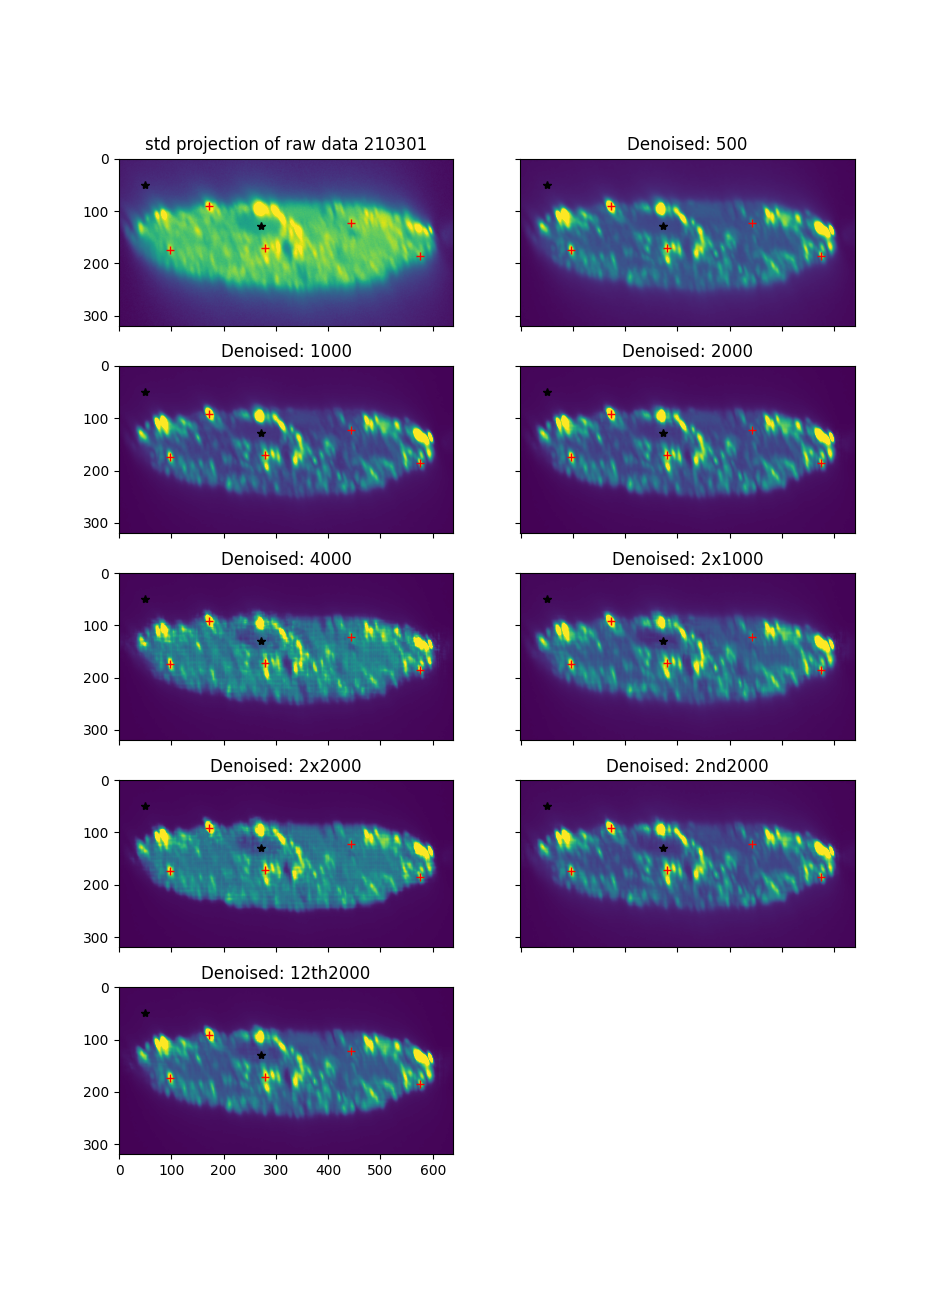

(-0.5, 639.5, 319.5, -0.5)

In [9]:
%matplotlib notebook
quantile = 0.99
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(9.5, 13), sharex=True, sharey=True)
axs[0,0].imshow(std_raw, clim=[0, np.quantile(std_raw, quantile)])
axs[0,0].set_title("std projection of raw data 210301")

for i_ax, (ax, std, string) in enumerate(zip(axs.flatten()[1:-1], std_denoised, denoised_strings)):
    ax.imshow(std, clim=[0, np.quantile(std, quantile)])
    ax.set_title("Denoised: " + string)

_ = [[ax.plot(pixel[1], pixel[0], 'r+') for pixel in pixels] for ax in axs.flatten()[:-1]]

_ = [[ax.plot(pixel[1], pixel[0], 'k*') for pixel in pixels_noise] for ax in axs.flatten()[:-1]]

axs[-1, -1].axis("off")


<IPython.core.display.Javascript object>


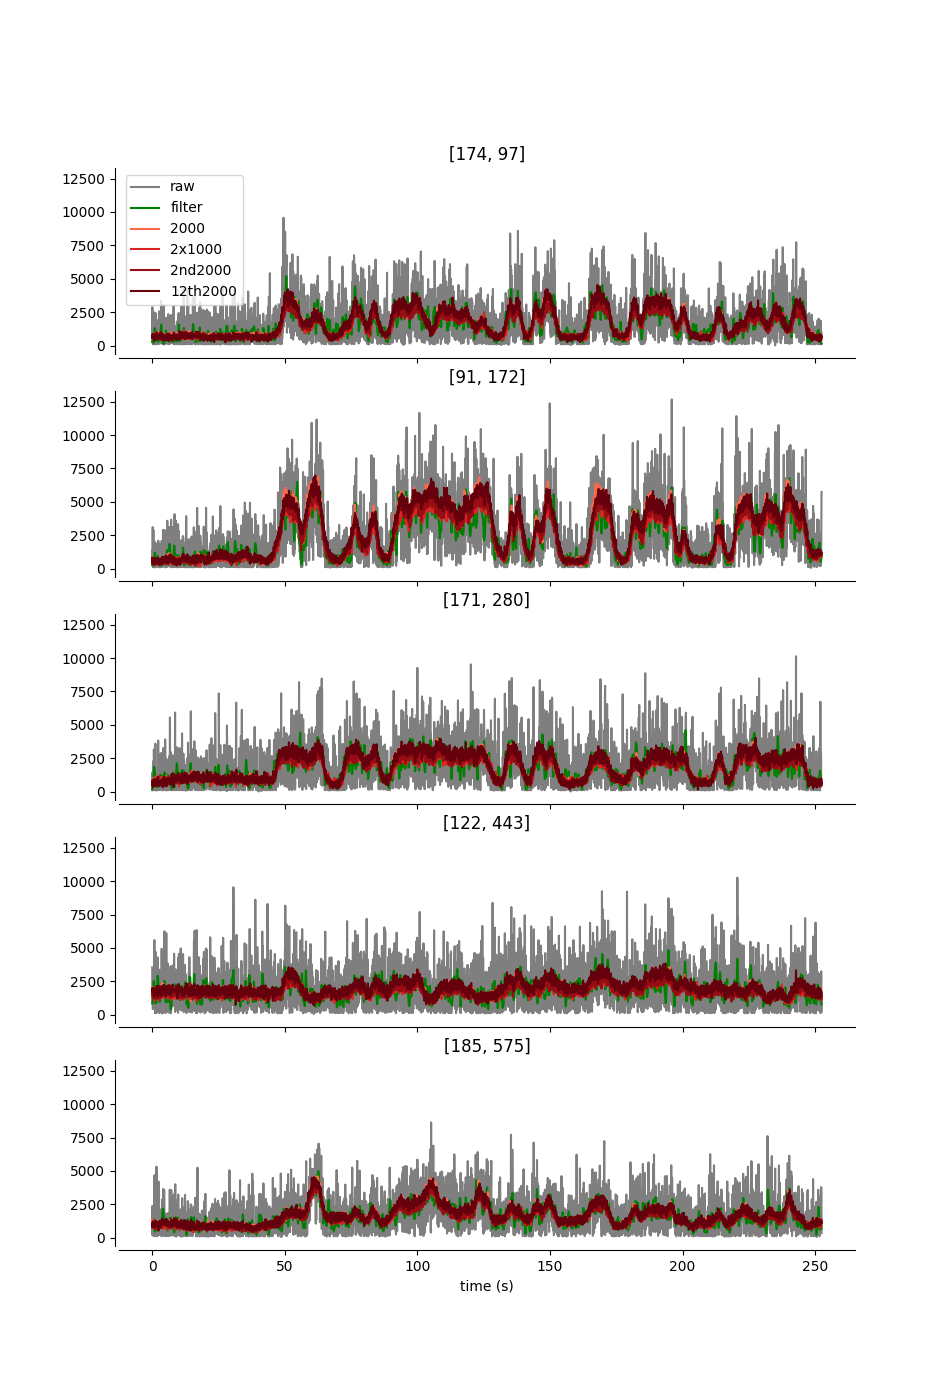

(0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.5946174548250673, 0.04613610149942329, 0.07558631295655516, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)
(0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.5946174548250673, 0.04613610149942329, 0.07558631295655516, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)
(0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.5946174548250673, 0.04613610149942329, 0.07558631295655516, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)
(0.9835755478662053, 0.4127950788158401, 0.28835063437139563, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.5946174548250673, 0.04613610149942329, 0.07558631295655516, 1.0)
(0.403921568627451, 0.0, 0.05098039

Text(0.5, 0, 'time (s)')

In [10]:
%matplotlib notebook

x = np.arange(4040) / 16

alpha = 1
spine_outward_shift=3

show_signal = [0, 0, 1, 0, 1, 0, 1, 1]

fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(9.5, 14), sharex=True, sharey=True)
for i_ax, (ax, pixel) in enumerate(zip(axs, pixels)):
    ax.plot(x, raw[:, pixel[0], pixel[1]], 'k', label="raw", alpha=0.5)
    ax.plot(x, gaussian_filter1d(medfilt(raw[:, pixel[0], pixel[1]], [5]), sigma=2), 'g', label="filter")
    
    for i_s, (show_this, d, string) in enumerate(zip(show_signal, denoised, denoised_strings)):
        if show_this:
            color = plt.cm.Reds(0.2+0.8*(i_s+1)/len(show_signal))
            print(color)
            ax.plot(x, d[:, pixel[0], pixel[1]], color=color, alpha=alpha, label=string)


    ax.set_title(pixel)
    if i_ax == 0:
        ax.legend()
        
    ax.spines['left'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
        
ax.set_xlabel("time (s)")
    
# ax.set_xlim([200/8, 800/8])
# ax.set_ylim([0, 3000])
# fig.suptitle("pixel signals")

<IPython.core.display.Javascript object>


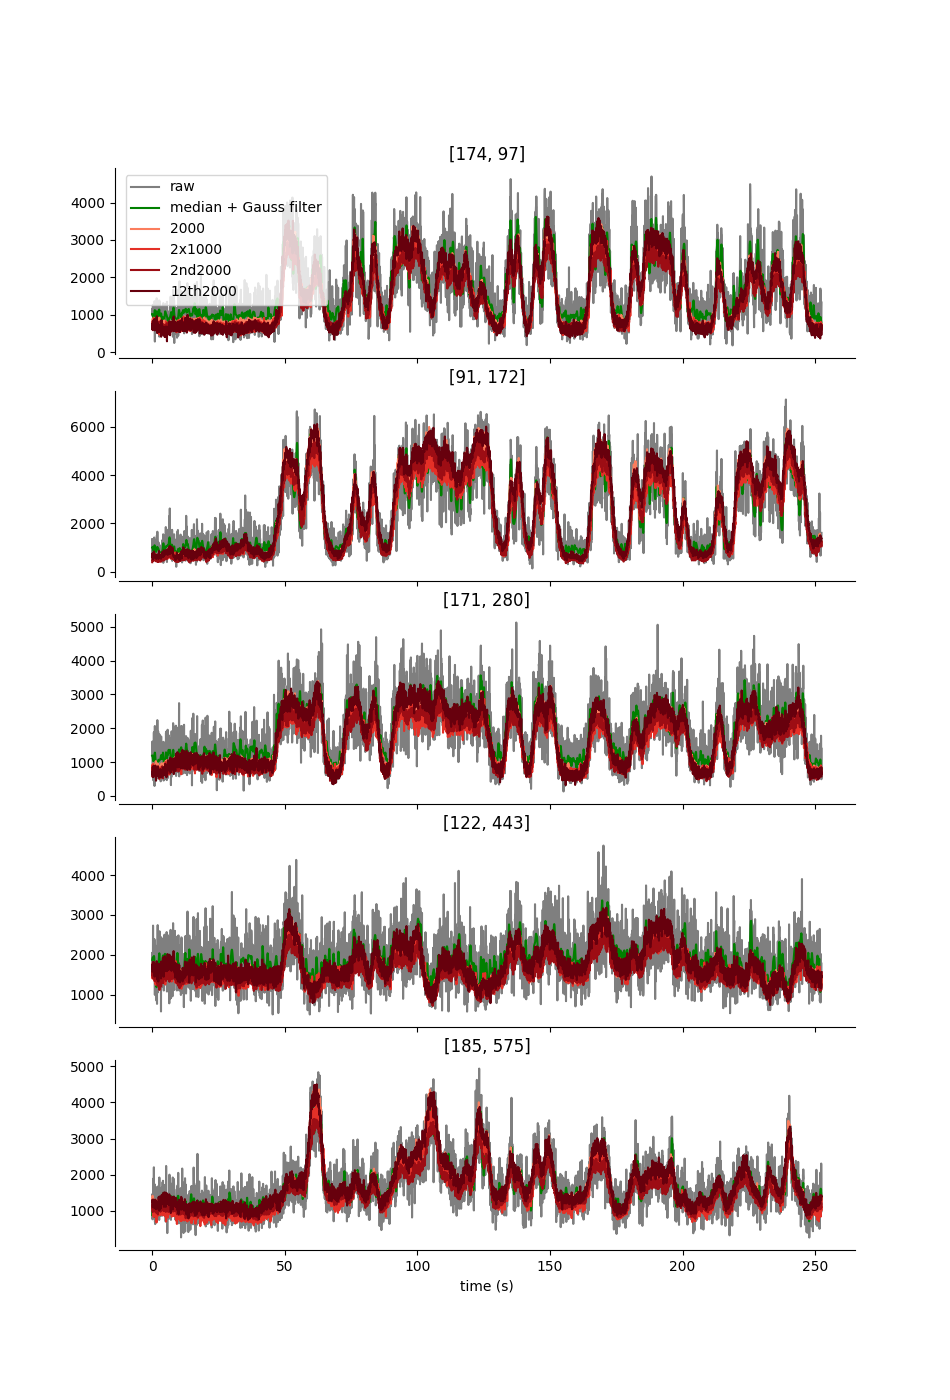

(0.9862206843521722, 0.49196462898885046, 0.3664744329104191, 1.0)
(0.8946251441753171, 0.18992695117262592, 0.15478662053056516, 1.0)
(0.6175009611687813, 0.05167243367935409, 0.07853902345251824, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)
(0.9862206843521722, 0.49196462898885046, 0.3664744329104191, 1.0)
(0.8946251441753171, 0.18992695117262592, 0.15478662053056516, 1.0)
(0.6175009611687813, 0.05167243367935409, 0.07853902345251824, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)
(0.9862206843521722, 0.49196462898885046, 0.3664744329104191, 1.0)
(0.8946251441753171, 0.18992695117262592, 0.15478662053056516, 1.0)
(0.6175009611687813, 0.05167243367935409, 0.07853902345251824, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)
(0.9862206843521722, 0.49196462898885046, 0.3664744329104191, 1.0)
(0.8946251441753171, 0.18992695117262592, 0.15478662053056516, 1.0)
(0.6175009611687813, 0.05167243367935409, 0.07853902345251824, 1.0)
(0.403921568627451, 0.0, 0.05098039

Text(0.5, 0, 'time (s)')

In [13]:
%matplotlib notebook
roi_size = 2
alpha = 1

x = np.arange(4040) / 16

alpha = 1
spine_outward_shift=3

show_signal = [0, 0, 1, 0, 1, 0, 1, 1]  # [1, 1, 1, 1, 0, 0, 0]  # compare across trials [0, 0, 1, 0, 1, 0, 1]

fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(9.5, 14), sharex=True, sharey=False)

for i_ax, (ax, pixel) in enumerate(zip(axs, pixels)):
    roi_signal = np.mean(raw[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]+roi_size], 
                    axis=(1,2))
    ax.plot(x, roi_signal, 'k', label="raw", alpha=0.5)
    ax.plot(x, gaussian_filter1d(medfilt(roi_signal, [5]), sigma=2), 'g', label="median + Gauss filter")
    
    for i_s, (show_this, d, string) in enumerate(zip(show_signal, denoised, denoised_strings)):
        if show_this:
            color = plt.cm.Reds(0.1+0.9*(i_s+1)/len(show_signal))
            print(color)
            roi_signal = d[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]]
            ax.plot(x, np.mean(roi_signal, axis=(1,2)), color=color, alpha=alpha, label=string)
            

    ax.set_title(pixel)
    if i_ax == 0:
        ax.legend()
        
    ax.spines['left'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
        
ax.set_xlabel("time (s)")
    
# ax.set_xlim([200/8, 800/8])
# ax.set_ylim([0, 3000])
# fig.suptitle("${}^2$ ROI signals".format(roi_size*2+1))

<IPython.core.display.Javascript object>


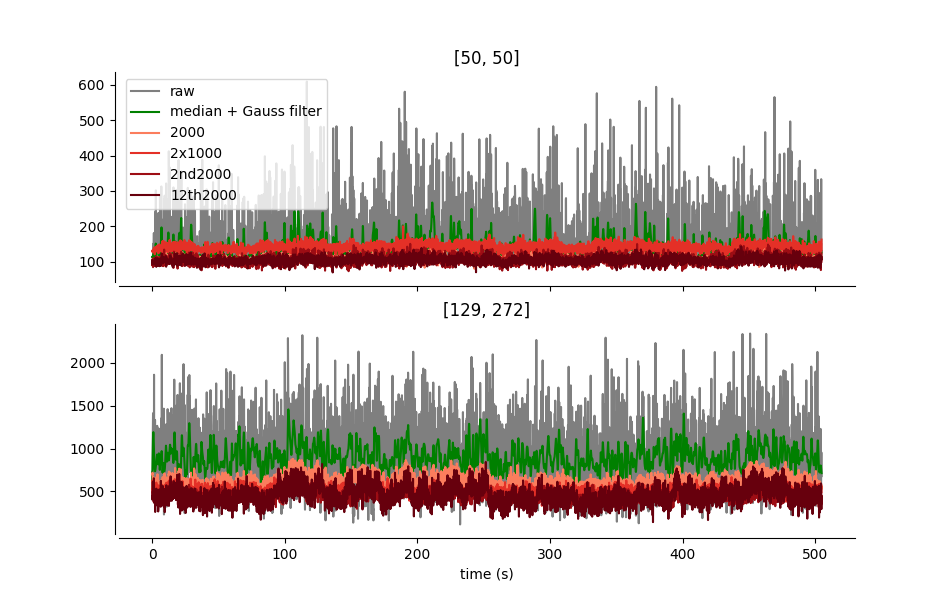

(0.9862206843521722, 0.49196462898885046, 0.3664744329104191, 1.0)
(0.8946251441753171, 0.18992695117262592, 0.15478662053056516, 1.0)
(0.6175009611687813, 0.05167243367935409, 0.07853902345251824, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)
(0.9862206843521722, 0.49196462898885046, 0.3664744329104191, 1.0)
(0.8946251441753171, 0.18992695117262592, 0.15478662053056516, 1.0)
(0.6175009611687813, 0.05167243367935409, 0.07853902345251824, 1.0)
(0.403921568627451, 0.0, 0.05098039215686274, 1.0)


Text(0.5, 0, 'time (s)')

In [12]:
%matplotlib notebook
roi_size = 2
alpha = 1

x = np.arange(4040) / 8

alpha = 1
spine_outward_shift=3

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(9.5, 6), sharex=True, sharey=False)
for i_ax, (ax, pixel) in enumerate(zip(axs, pixels_noise)):
    roi_signal = np.mean(raw[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]+roi_size], 
                    axis=(1,2))
    ax.plot(x, roi_signal, 'k', label="raw", alpha=0.5)
    ax.plot(x, gaussian_filter1d(medfilt(roi_signal, [5]), sigma=2), 'g', label="median + Gauss filter")
    for i_s, (show_this, d, string) in enumerate(zip(show_signal, denoised, denoised_strings)):
        if show_this:
            color = plt.cm.Reds(0.1+0.9*(i_s+1)/len(show_signal))
            print(color)
            roi_signal = d[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]]
            ax.plot(x, np.mean(roi_signal, axis=(1,2)), color=color, alpha=alpha, label=string)
    ax.set_title(pixel)
    if i_ax == 0:
        ax.legend()
        
    ax.spines['left'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
        
ax.set_xlabel("time (s)")
    
# ax.set_xlim([200/8, 800/8])
# ax.set_ylim([0, 3000])
# fig.suptitle("${}^2$ ROI signals".format(roi_size*2+1))